In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/lider/Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Correlation
import seaborn as sns


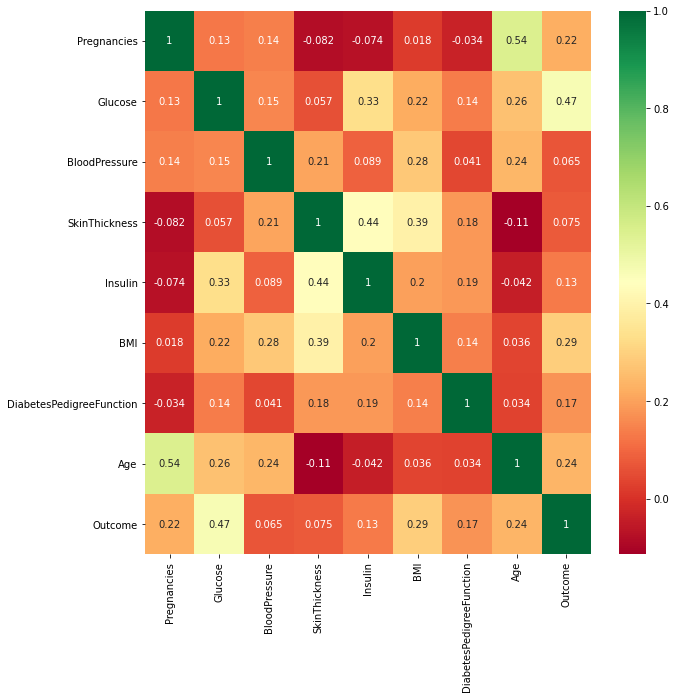

In [11]:
plt.figure(figsize=(10,10))
g=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [19]:
diabet_true=len(df[df['Outcome']==1])
diabet_false=len(df[df['Outcome']==0])

In [20]:
diabet_true

268

In [21]:
diabet_false


500

In [ ]:
#test train

In [28]:
from sklearn.model_selection import train_test_split

In [55]:
X=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [56]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [63]:
print("total number of rows:{0}".format(len(df)))
print("number of rows missing Glucose:{0}".format(len(df.loc[df['Glucose']==0])))
print("number of rows missing BloodPressure :{0}".format(len(df.loc[df['BloodPressure']==0])))
print("number of rows missing SkinThickness :{0}".format(len(df.loc[df['SkinThickness']==0])))
print("number of rows missing Insulin :{0}".format(len(df.loc[df['Insulin']==0])))
print("number of rows missing BMI :{0}".format(len(df.loc[df['BMI']==0])))
print("number of rows missing DiabetesPedigreeFunction :{0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("number of rows missing Age :{0}".format(len(df.loc[df['Age']==0])))


total number of rows:768
number of rows missing Glucose:5
number of rows missing BloodPressure :35
number of rows missing SkinThickness :227
number of rows missing Insulin :374
number of rows missing BMI :11
number of rows missing DiabetesPedigreeFunction :0
number of rows missing Age :0


In [67]:
from sklearn.impute import SimpleImputer

In [69]:
fill_values=SimpleImputer(missing_values=0,strategy='mean')
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.fit_transform(X_test)

In [ ]:
#Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
predictdata=rf.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy_score(y_test,predictdata)

0.8506493506493507